In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Дисклеймер: не все получилось, пришлось ближе к дедлайну менять тему, так как не получилось спарсить сайт, что хотела. Поэтому было принято решение изменить данные на готовые, поэтому сделана пока не вся визуализация, но в конце описаны идеи того, что я планирую сделать.

# ВЫБОР ТЕМЫ
Мною был найден датасет с информацией о влиянии музыки на психологическое состояние человека (тревожности, депрессии, бессоницы, ОКР и в целом настроения). Планируется провести EDA (разведовательный анализ данных), визуализация, после выдвижение гипотез, их проверка и предсказание наличия заболеваний или влияние на настроение с помощью машинного обучения.

In [191]:
data = pd.read_csv('mxmh_survey_results.csv')

# Предварительная обработка данных

Данные были взяты с сайта Kaggle, датасет содержит информацию о 737 респондентах и следующих характеристиках:
- `Timestamp` - время ответа на опросник
- `Age` - возраст
- `Primary streaming service` - основной сервис, использующийся для прослушивания музыки
- `Hours per day` - количество часов прослушивания музыки в день
-` While working `- слушает ли человек музыку во время работы
- `Instrumentalist` - играет ли человек на музыкальных инструментах регулярно
- `Composer` - сочиняет ли респондент музыку
- `Fav genre` - любимый жанр
- `Exploratory` - ищет ли респондент новые жанры или исполнителей
- `Foreign languages` - слушает ли человек музыку на языке, на котором не говорит свободно
- `BPM `- количество ударов в минуту у любимого жанра
- `Frequency [Classical]` - насколько часто респондент слушает классическую музыку
- `Frequency [Country]`- насколько часто респондент слушает кантри
- `Frequency [EDM]` - насколько часто респондент слушает EDM, то есть электронную танцевальную музыку
- `Frequency [Folk]` - насколько часто респондент слушает фолк
-` Frequency [Gospel]` - насколько часто респондент слушает госпел
- `Frequency [Hip hop]` - насколько часто респондент слушает хип-хоп
- `Frequency [Jazz]` - насколько часто респондент слушает джаз
- `Frequency [K pop]` - насколько часто респондент слушает К-поп
- `Frequency [Latin]` - насколько часто респондент слушает латинскую музыку
- `Frequency [Lofi]` - насколько часто респондент слушает Lo-Fi
- `Frequency [Metal]` - насколько часто респондент слушает метал
- `Frequency [Pop]` - насколько часто респондент слушает поп
- `Frequency [R&B] `- насколько часто респондент слушает R&B
- `Frequency [Rap]` - насколько часто респондент слушает реп
- `Frequency [Rock]` - насколько часто респондент слушает рок
- `Frequency [Video game music]` - насколько часто респондент слушает музыку из видео-игр
- `Anxiety` - частота испытывания тревожности
- `Depression` - частота испытывания депрессии
- `Insomnia` - частота бессоницы
- `OCD` - частота испытывания синдромов обсессивно-компульсивного расстройства
- `Music effects` - эффект музыки на настроение
- `Permissions` - дает ли респондент разрешение на публикацию данных


In [39]:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

**Интерпретация частоты тревожности, депрессии, бессоницы, ОКР**
- 0 - Я не испытываю этого
- 10 - Я испытываю это регулярно/постоянно

In [8]:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


Напишем функцию, которая заменит категориальные переменные о частоте прослушивания определенного жанра на
- 0 (никогда),
- 1 (редко),
- 2 (иногда),
- 3 (очень часто)

А значения 'Yes' или 'No' на 1 или 0 соответственно

In [70]:
def correct_values_frequency(value: str):
     corrected_value = float(value.replace('Very frequently', '3').replace('Sometimes', '2').replace('Rarely', '1').replace('Never', '0'))
     return corrected_value

In [192]:
def correct_values_bin(value: str):
     corrected_value = int(value.replace('Yes', '1').replace('No', '0'))
     return corrected_value


In [193]:
data[[ 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']] = data[[ 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']].applymap(correct_values_frequency, na_action = 'ignore')


In [194]:
data[['While working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign languages']]= data[['While working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign languages']].applymap(correct_values_bin, na_action = 'ignore')

In [105]:
data.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1,1.0,...,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1,0.0,...,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0,1.0,...,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1,1.0,...,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1,0.0,...,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,Improve,I understand.


Посмотрим на типы данных в таблице.

In [50]:
data.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


Посмотрим на количество пропусков.  
- Пропуск в графе "Возраст" заполним модой возраста (пропуск в одном объекте не так значителен)
- Пропуски в признаке "Основной стриминг сервис" заполним модой
- В пропусках "Слушает ли музыку во время работы" поставим "no"
- В пропусках "Играет ли на инструменте" поставим "no"
- В пропусках "Сочиняет ли музыку" поставим "no"
- В пропусках "Слушает ли на иностранных языках" поставим "no"
- В пропусках "Экспериментирует ли с жанрами/исполнителями" поставим "no"
- Столбец BMP, скорее всего, придется удалить, так как в нем слишком много пропусков (около 15% от всех наблюдений). Но пока что делать этого не будем, вдруг будет какое-то влияние, например, на тревожность. Пока оставим медиану.
- В пропуски в "музыкальный эффект" поставим "No effect"

То есть, чтобы избежать в дальнейшем неверных гипотез или некорректного обучения моделей в пропусках при бинарных признаках мы поставили значение "нет", чтобы исключить ложные зависимости.


In [51]:
data.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [195]:
data['Age'].fillna(data['Age'].mode()[0], inplace=True)
data['Primary streaming service'].fillna(data['Primary streaming service'].mode()[0], inplace=True)
data['While working'].fillna(0, inplace=True)
data['Instrumentalist'].fillna(0, inplace=True)
data['Composer'].fillna(0, inplace=True)
data['Foreign languages'].fillna(0, inplace=True)
data['Music effects'].fillna('No effect', inplace=True)
data['BPM'].fillna(data['BPM'].median(), inplace=True)


In [168]:
data.isna().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

Удалим столбец Permissions, так как все присутствующие в опросе респонденты дали согласие на использование данных. И превратим столбец со временем в datetime формат.

In [196]:
del data['Permissions']

In [197]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.head(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,2022-08-27 19:29:02,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1,1.0,156.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,3.0,1.0,0.0,3.0,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,No effect
1,2022-08-27 19:57:31,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1,0.0,119.0,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,No effect
2,2022-08-27 21:28:18,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0,1.0,132.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,No effect
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1,1.0,84.0,2.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,Improve
4,2022-08-27 21:54:47,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1,0.0,107.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,2.0,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,Improve
5,2022-08-27 21:56:50,18.0,Spotify,5.0,1.0,1.0,1.0,Jazz,1,1.0,86.0,1.0,2.0,0.0,0.0,0.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,3.0,3.0,3.0,0.0,8.0,8.0,7.0,7.0,Improve
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,1.0,1.0,0.0,Video game music,1,1.0,66.0,2.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,4.0,8.0,6.0,0.0,Improve
7,2022-08-27 22:18:59,21.0,Spotify,1.0,1.0,0.0,0.0,K pop,1,1.0,95.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,3.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0,5.0,3.0,5.0,3.0,Improve
8,2022-08-27 22:33:05,19.0,Spotify,6.0,1.0,0.0,0.0,Rock,0,0.0,94.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,Improve
9,2022-08-27 22:44:03,18.0,I do not use a streaming service.,1.0,1.0,0.0,0.0,R&B,1,1.0,155.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,5.0,1.0,Improve


In [169]:
data.dtypes

Timestamp                       datetime64[ns]
Age                                    float64
Primary streaming service               object
Hours per day                          float64
While working                          float64
Instrumentalist                        float64
Composer                               float64
Fav genre                               object
Exploratory                              int64
Foreign languages                      float64
BPM                                    float64
Frequency [Classical]                  float64
Frequency [Country]                    float64
Frequency [EDM]                        float64
Frequency [Folk]                       float64
Frequency [Gospel]                     float64
Frequency [Hip hop]                    float64
Frequency [Jazz]                       float64
Frequency [K pop]                      float64
Frequency [Latin]                      float64
Frequency [Lofi]                       float64
Frequency [Me

# EDA и визуализация данных


In [198]:
data.describe()

,Timestamp,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
count,736,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,7.360000e+02,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,2022-09-03 19:54:51.849184768,25.197011,3.572758,0.786685,0.319293,0.171196,0.713315,0.548913,1.358818e+06,1.335598,0.817935,1.023098,1.012228,0.381793,1.384511,1.027174,0.735054,0.607337,1.067935,1.220109,2.031250,1.259511,1.335598,2.070652,1.250000,5.837636,4.796196,3.738451,2.637228
min,2022-08-27 19:29:02,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-08-28 19:58:27.249999872,18.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.050000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,1.000000,0.000000
50%,2022-08-29 13:41:45.500000,21.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.200000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,6.000000,5.000000,3.000000,2.000000
75%,2022-09-03 17:26:35.500000,28.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.400000e+02,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,8.000000,7.000000,6.000000,5.000000
max,2022-11-09 01:55:20,89.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+09,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,10.000000,10.000000,10.000000,10.000000
std,NaN,12.049695,3.028199,0.409927,0.466520,0.376936,0.452521,0.497940,3.686048e+07,0.988442,0.922584,1.048878,1.009405,0.701520,1.031598,0.938559,1.002945,0.864666,1.027912,1.134698,0.934801,1.058451,1.053732,1.034327,1.071587,2.793054,3.028870,3.088689,2.842017


Видно, что есть какой то выброс по BPM - давайте посмотрим.
Понятно, что человек либо не знал, что это, либо ошибся. Заменим медианой.

In [199]:
data.loc[data['BPM'] > 600, 'BPM'] = data['BPM'].median()

Также мною было замечено, что есть люди, поставившие, что они слушают музыку более 20 часов в день, что, будем честны, маловероятно. Давайте на них посмотрим. Можно заметить, что двое из них поставили бессоницу, поэтому это может быть объяснимо - либо люди ставят себе белый шум под сон. Однако в ходе исследования данные нам мешали, поэтому было принято решение заменить в этих данных значение на медиану.


In [200]:
data.loc[data['Hours per day'] >= 20]
data.loc[data['Hours per day'] >= 20, 'Hours per day'] = data['Hours per day'].median()

Выводы:
- Средний возраст - 25 лет, то есть можно сказать, что в основном этот опрос распространялся среди молодых людей. Особенно это заметно по 75% квантилю. Скорее всего, взрослых и пожилых людей в опросе мало.
- В среднем, люди слушали музыку около 3,5 часов в день, что достаточно много. Также можно заметить, что кто-то отметил 24 часа в сутки в опросе, что маловероятно.

In [173]:
data['BPM'].nunique() #ну ладно, вроде норм

134

In [113]:
pd.set_option('display.max_columns', None)

In [201]:
data[[ 'Age', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()


,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
Age,1.000000,-0.093205,-0.084029,-0.126895,-0.034395,-0.179260,-0.135735,-0.029851,0.100334,0.122190,-0.101443,0.115128,0.147535,-0.138321,0.085783,-0.165445,0.085393,-0.214841,-0.014122,-0.181364,0.041003,-0.195090,0.055319,-0.262920,-0.177386,-0.121022,0.007363,-0.131122
Hours per day,-0.093205,1.000000,0.291256,-0.021582,0.142377,0.159064,0.110436,0.033212,-0.005311,0.069445,0.148615,0.116214,0.028260,0.149573,0.122860,0.097535,0.099613,0.118134,0.131143,0.004333,0.128179,0.168595,0.074013,0.057346,0.070545,0.140496,0.151378,0.133408
While working,-0.084029,0.291256,1.000000,0.086291,0.051754,0.139285,0.121173,-0.013876,0.052680,-0.012894,0.134884,0.042481,0.042304,0.036575,0.089348,0.140324,0.085797,0.195882,0.025029,0.074227,0.102673,0.080913,-0.006121,0.127762,0.032689,0.054792,0.025184,0.077713
Instrumentalist,-0.126895,-0.021582,0.086291,1.000000,0.400539,0.073282,-0.023396,-0.022038,0.245286,-0.041773,-0.090165,-0.014081,0.063516,-0.167813,0.185238,-0.039947,0.075132,-0.005574,0.049539,-0.107145,-0.110172,-0.118637,-0.010160,0.063276,0.027310,0.006157,0.025460,0.014111
Composer,-0.034395,0.142377,0.051754,0.400539,1.000000,0.096692,-0.037426,-0.071808,0.097554,0.023240,0.024398,0.055280,0.071488,-0.015565,0.179121,-0.020214,0.035381,0.033149,0.093096,-0.046093,0.021490,-0.004403,0.049197,-0.008421,0.003176,0.050861,0.094605,0.012331
Exploratory,-0.179260,0.159064,0.139285,0.073282,0.096692,1.000000,0.180059,0.006328,0.060261,0.041011,0.122897,0.138743,0.028108,0.218971,0.172131,0.162168,0.077013,0.223274,0.152206,0.175589,0.169743,0.236283,0.162513,0.027356,0.021250,0.061541,0.053356,0.032219
Foreign languages,-0.135735,0.110436,0.121173,-0.023396,-0.037426,0.180059,1.000000,0.054419,0.106200,-0.060552,0.158042,0.084075,0.002942,0.152715,0.110689,0.316125,0.226369,0.184886,0.072423,0.082938,0.142387,0.167038,0.001206,0.196335,0.089115,0.091867,0.033763,-0.023497
BPM,-0.029851,0.033212,-0.013876,-0.022038,-0.071808,0.006328,0.054419,1.000000,-0.049967,-0.035064,0.080716,-0.054644,-0.141651,-0.066814,-0.047683,0.006504,-0.118254,-0.054704,0.180429,-0.039911,-0.111734,-0.001419,0.113144,0.045202,0.020124,0.024823,0.036015,-0.027631
Frequency [Classical],0.100334,-0.005311,0.052680,0.245286,0.097554,0.060261,0.106200,-0.049967,1.000000,-0.003029,-0.080976,0.109063,0.150487,-0.072017,0.302534,0.050013,0.135291,0.090013,-0.025919,0.004832,-0.000129,-0.126568,-0.075124,0.103081,-0.047259,-0.008253,0.076474,-0.007941
Frequency [Country],0.122190,0.069445,-0.012894,-0.041773,0.023240,0.041011,-0.060552,-0.035064,-0.003029,1.000000,0.005758,0.341339,0.237882,0.039347,0.062286,-0.040439,0.097869,-0.038588,0.099416,0.057088,0.051237,0.044743,0.177462,-0.063993,-0.009375,-0.043484,-0.051349,0.059096


Выводы:
- Возраст коррелирует с прослушиванием Lo-Fi музыки и музыки для видеоигр
- Наличие депрессии немного коррелирует с частотой прослушивания рока, репа и метала, хотя значение не большое (около 0.2)

In [118]:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,2022-08-27 19:29:02,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1,1.0,156.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,3.0,1.0,0.0,3.0,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,No effect
1,2022-08-27 19:57:31,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1,0.0,119.0,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,No effect
2,2022-08-27 21:28:18,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0,1.0,132.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,No effect
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1,1.0,84.0,2.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,Improve
4,2022-08-27 21:54:47,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1,0.0,107.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,2.0,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,Improve


In [ ]:
#не запускайте следующую ячейку, 9 минут

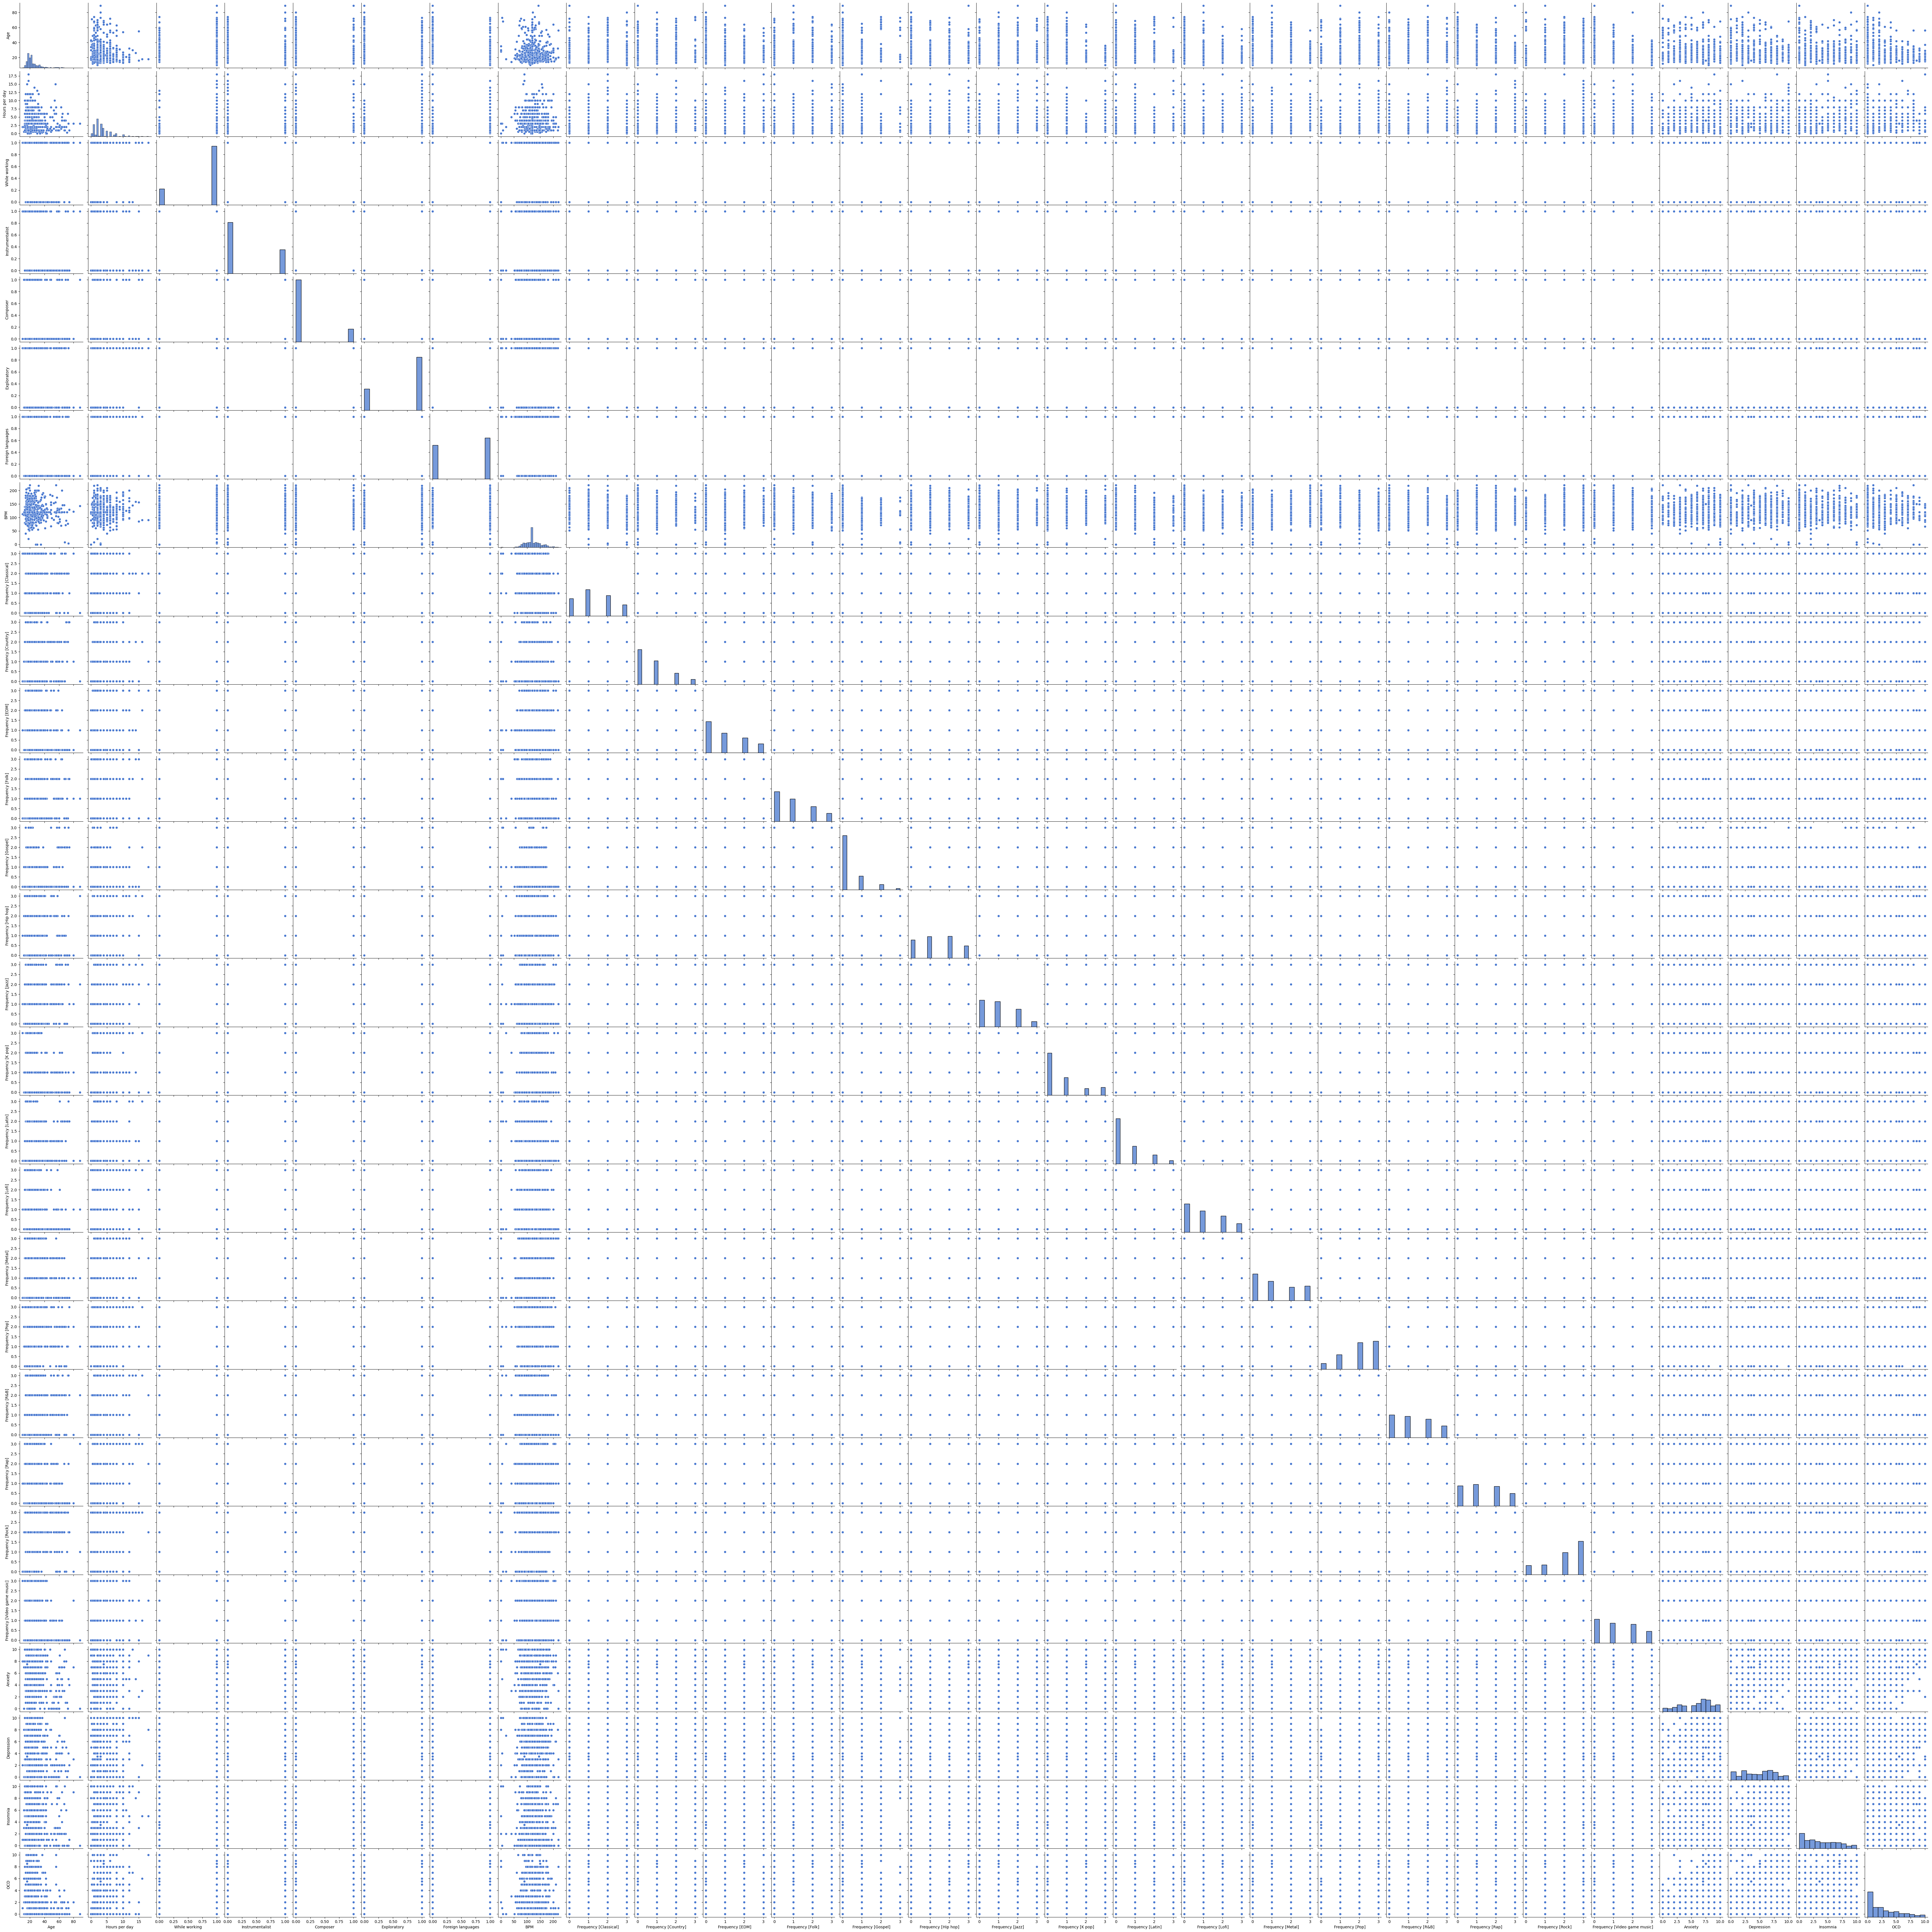

In [206]:
sns.pairplot(data)


Наверное не очень репрезентативно с категориальными переменными.

Сделаем пару графичков.

Text(0.5, 1.0, 'Influence of age on the hours of listening to music')

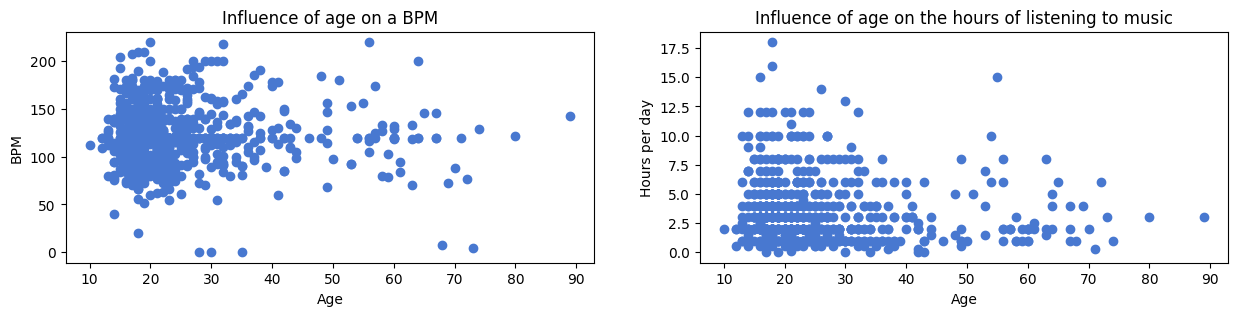

In [202]:
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(15, 3))


ax1.scatter(data["Age"], data["BPM"])
ax1.set_xlabel("Age")
ax1.set_ylabel("BPM")
ax1.set_title("Influence of age on a BPM")

ax2.scatter(data["Age"], data["Hours per day"])
ax2.set_xlabel("Age")
ax2.set_ylabel("Hours per day")
ax2.set_title("Influence of age on the hours of listening to music")


Видно, что в большинстве своем быструю музыку слушает, в основном, люди до 50 лет. Также больше 10 часов в день слушает молодежь.


[Text(0.5, 1.0, 'Hours per day')]

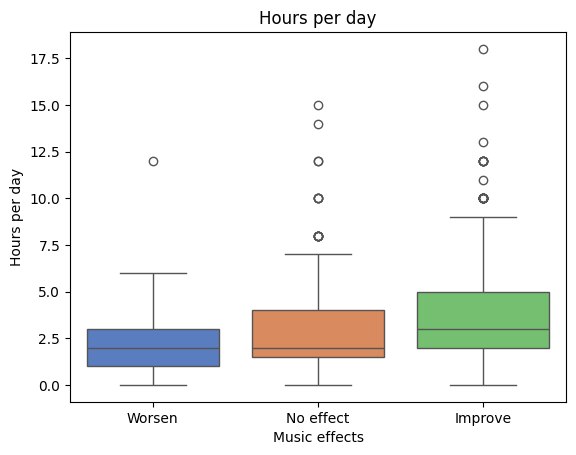

In [203]:
sns.set_palette('muted')
new_data = data.sort_values('Music effects',ascending=False).reset_index()
sns.boxplot(hue='Music effects', x='Music effects', y='Hours per day', data=new_data[['Music effects', "Hours per day"]]).set(title='Hours per day')


Как будто количество прослушиваемых часов музыки влияет на улучшение настроения, но здесь возможно и обратная корреляция - то, что музыка улучшает настроение влияет на количество часов. Надо подумать..


[Text(0.5, 1.0, ''), Text(0.5, 0, '')]

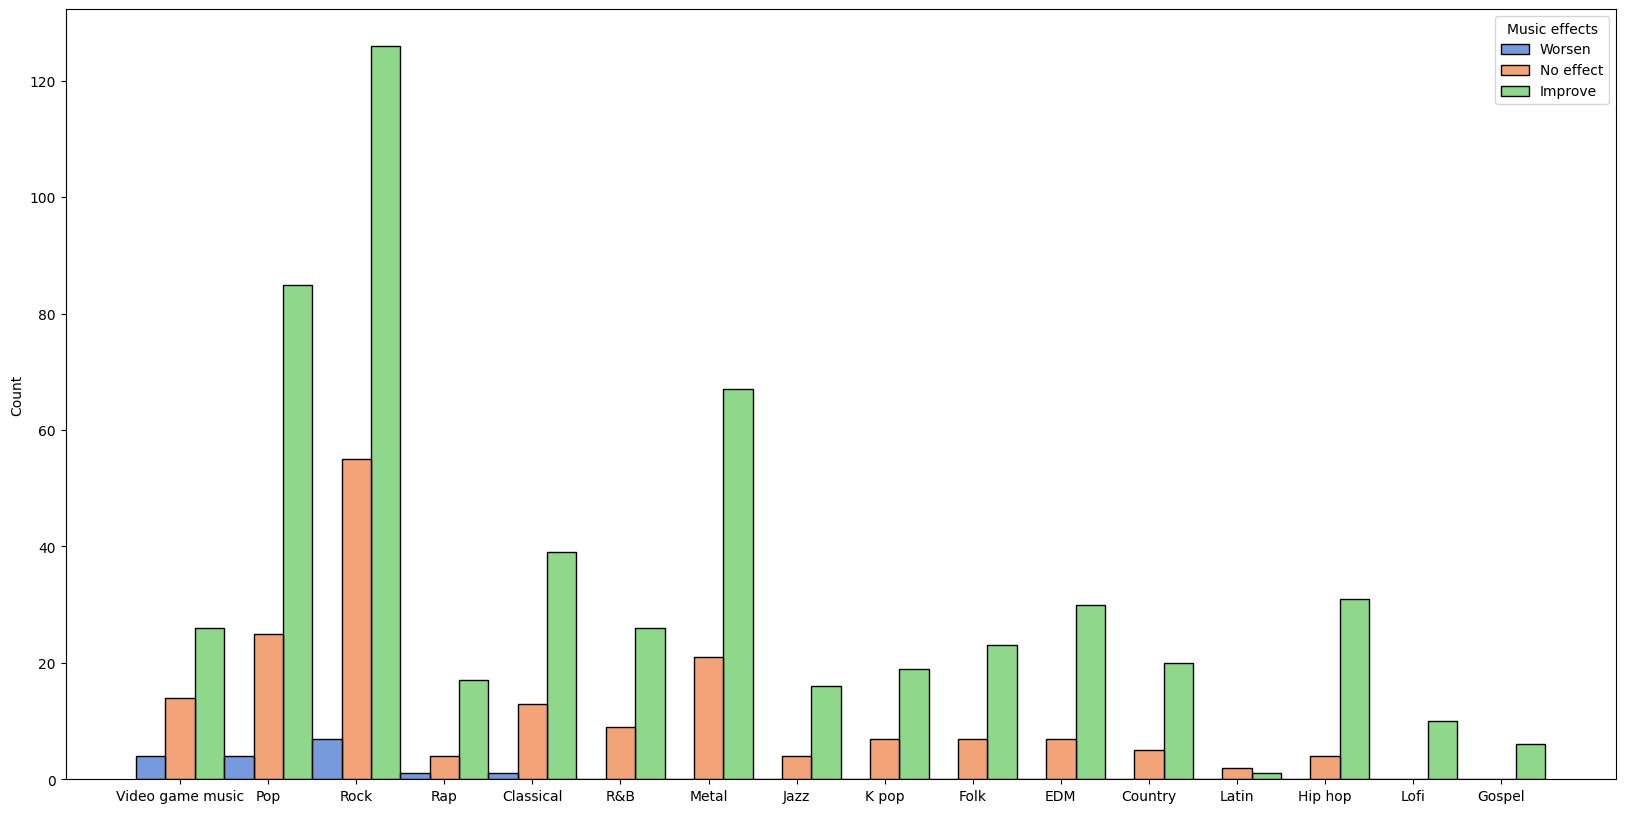

In [145]:
plt.figure(figsize=(20,10))
new_data = data.sort_values('Music effects',ascending=False).reset_index()
sns.histplot(data=new_data[['Fav genre', 'Music effects']], x='Fav genre', hue='Music effects', multiple='dodge').set(title='',  xlabel='')


Видно, что чаще всего у любителей попа, рока, метала и классической музыки она улучшает настроение, но это может быть связано с особенностями датасета.

Text(0.5, 1.0, 'Influence of hours per day on OCD')

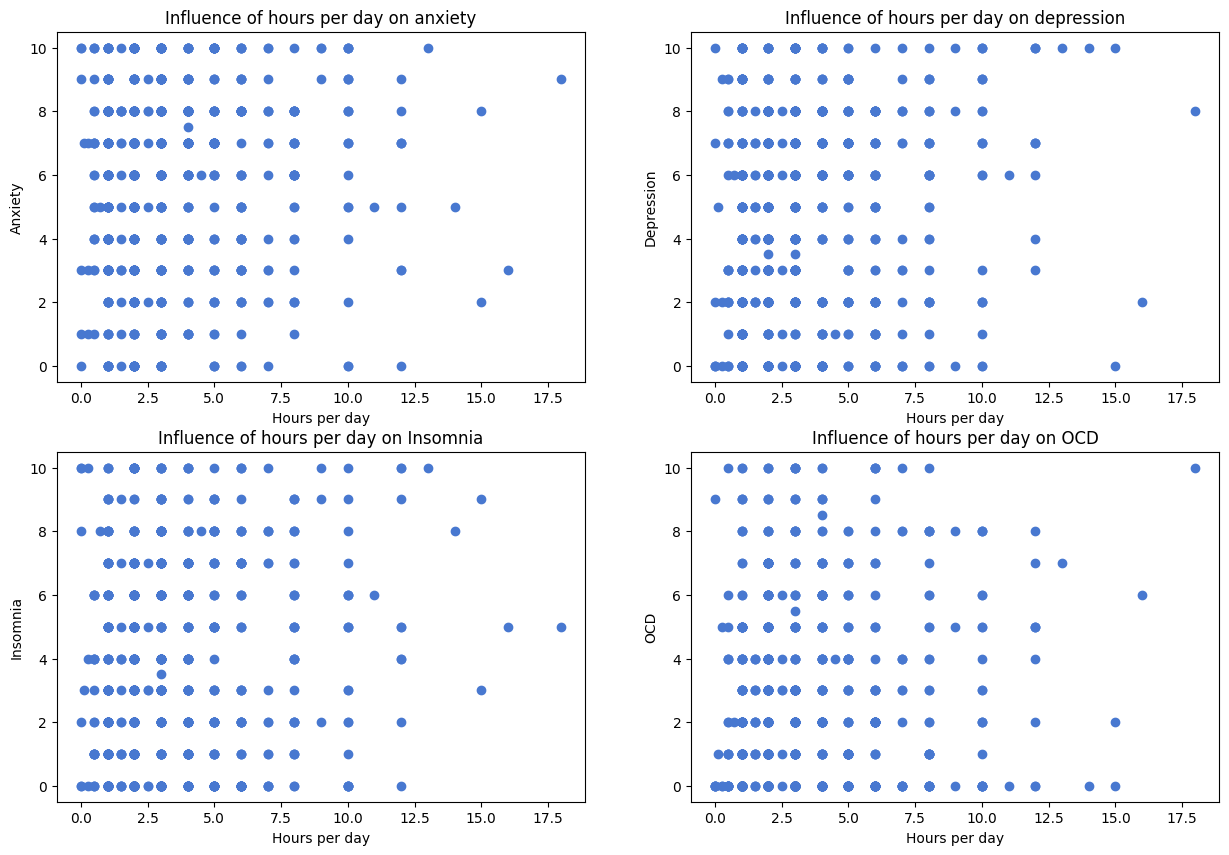

In [204]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 10))


ax1.scatter(data["Hours per day"], data["Anxiety"])
ax1.set_xlabel("Hours per day")
ax1.set_ylabel("Anxiety")
ax1.set_title("Influence of hours per day on anxiety")

ax2.scatter(data["Hours per day"], data["Depression"])
ax2.set_xlabel("Hours per day")
ax2.set_ylabel("Depression")
ax2.set_title("Influence of hours per day on depression")

ax3.scatter(data["Hours per day"], data["Insomnia"])
ax3.set_xlabel("Hours per day")
ax3.set_ylabel("Insomnia")
ax3.set_title("Influence of hours per day on Insomnia")

ax4.scatter(data["Hours per day"], data["OCD"])
ax4.set_xlabel("Hours per day")
ax4.set_ylabel("OCD")
ax4.set_title("Influence of hours per day on OCD")

Как будто бы нет зависимостей уровня тревожности, депрессии, бессоницы или ОКР от количества часов.

In [181]:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects'],
      dtype='object')

<Axes: xlabel='Music effects', ylabel='Age'>

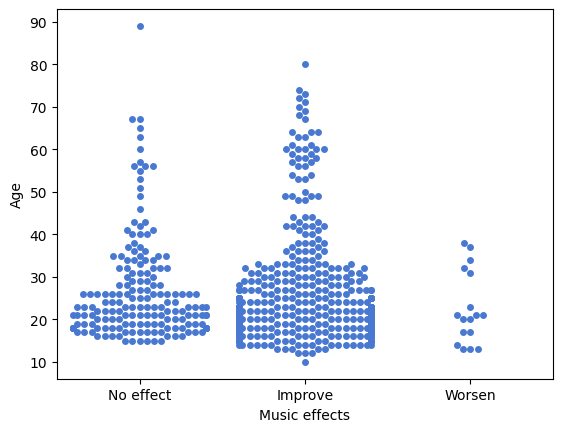

In [205]:
sns.swarmplot(x='Music effects', y='Age', data=data[['Age', 'Music effects']])

Заметим, что как будто бы от музыки состояние ухудшается только у людей младше 40.

Что планируется сделать:
1. Проанализировать влияние конкретного жанра на различные состояния. Есть пара озвученных гипотез про метал, рок и реп музыку.
2. Возможно создать переменную, отвечающую за общее состояние человека (например, как сумма показателей по депрессии, тревожности, бессонице и ОКР). Возможно, зависимости будут виднее.
3. Возможно я ограничу датасет, убрав некоторые столбцы или вовсе значения для пожилых людей. Но тогда останется мало по МО, поэтому думаем.
4. Хотелось бы как-то связать влияние музыки на состояние с жанром и с тем, слушает ли человек музыку во время работы, является ли он музыкантом или сочиняет музыку.
5. Еще одна гипотеза связана с экспериментами в музыке - влияет ли это как-то на депрессию или ОКР

По поводу МО - можно предсказывать влияние музыки на настроение либо на общее состояние человека (как сумма), либо брать 5 целевых переменных, но это кажется странным.